
 Rifa- hydecounty/wilmington, North Carolina


In [1]:
!apt-get install -y python3-gdal
!pip install rasterio
!pip install osmnx
!pip install mapclassify folium matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  gdal-bin python-numpy-doc python3-pytest
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,494 kB of archives.
After this operation, 23.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.6.4+dfsg-1~jammy0 [1,027 kB]
Fetched 4,494 kB in 1s (4,161 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 123614 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%3a1.21.5-1ubuntu22.04.1_amd64.deb ...
Unpacking python3-numpy (1:1.21.5-1ubuntu

In [2]:
import osmnx as ox
from osgeo import gdal
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import LineString
from rasterio.mask import mask
import rasterio

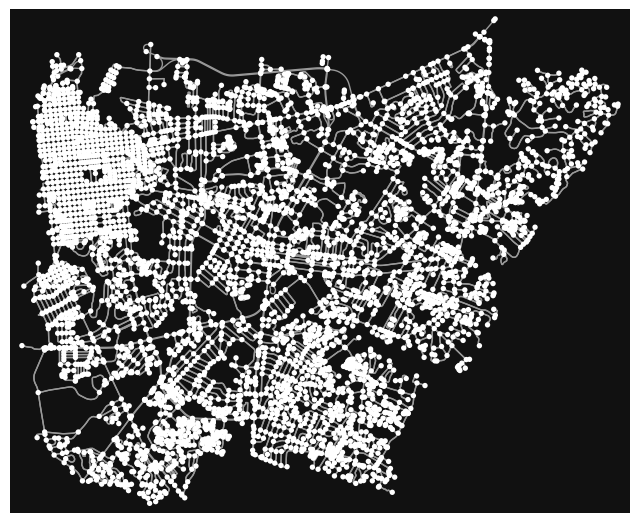

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
# !pip install osmnx # install the osmnx library
import osmnx as ox # import the library and alias it as 'ox' for easier use
place_name = "Wilmington, North Carolina, USA"
G = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(G)

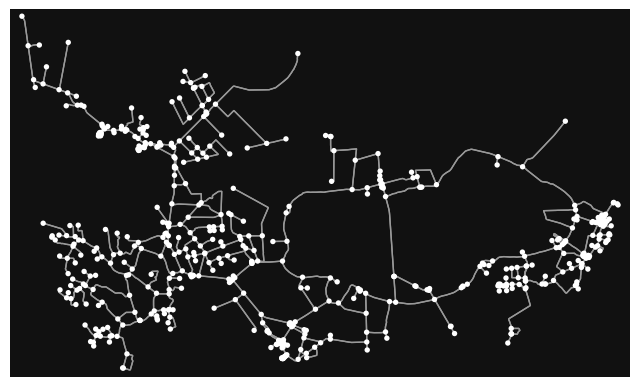

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [46]:
!pip install osmnx # install the osmnx library
import osmnx as ox # import the library and alias it as 'ox' for easier use
place_name = "Hyde County, NC, USA" # Changed the place name to be more specific and corrected potential typo
graph = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(graph)

In [4]:
Wilmington_drive = ox.speed.add_edge_speeds(G)
Wilmington_drive = ox.speed.add_edge_travel_times(G)

<ipython-input-4-09ce44ac5255>:1: FutureWarning: The `add_edge_speeds` function has moved to the `routing` module. Calling `speed.add_edge_speeds` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_speeds` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  Wilmington_drive = ox.speed.add_edge_speeds(G)
<ipython-input-4-09ce44ac5255>:2: FutureWarning: The `add_edge_travel_times` function has moved to the `routing` module. Calling `speed.add_edge_travel_times` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_travel_times` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  Wilmington_drive = ox.speed.add_edge_travel_times(G)


Re-imported the modules and apply elevation data:

In [107]:

Wilmington_drive = ox.elevation.add_node_elevations_raster(Wilmington_drive, 'Copernicus_DSM_COG_10_N34_00_W078_00_HAND (3).tif', cpus=1)
Wilmington_drive = ox.add_edge_grades(Wilmington_drive, add_absolute=True)

In [108]:
Wilmington_drive_node, Wilmington_drive_edge = ox.graph_to_gdfs(Wilmington_drive)

In [109]:
Wilmington_drive_node

,y,x,street_count,elevation,highway,geometry
osmid,,,,,,
172430723,34.188482,-77.865391,1,5.507142,NaN,POINT (-77.86539 34.18848)
172430724,34.188797,-77.865052,3,5.507162,NaN,POINT (-77.86505 34.18880)
172430728,34.188937,-77.864525,1,6.537331,NaN,POINT (-77.86453 34.18894)
172430736,34.188552,-77.864869,3,5.507162,NaN,POINT (-77.86487 34.18855)
172430771,34.240036,-77.905880,3,0.000020,NaN,POINT (-77.90588 34.24004)
...,...,...,...,...,...,...
12198738899,34.208062,-77.871732,3,0.000080,NaN,POINT (-77.87173 34.20806)
12198769503,34.208001,-77.871216,3,0.000040,NaN,POINT (-77.87122 34.20800)
12198769507,34.208162,-77.871713,3,0.000080,NaN,POINT (-77.87171 34.20816)


In [69]:
# Assuming Wilmington_drive_node is your DataFrame
highest_elevation = Wilmington_drive_node['elevation'].max()
lowest_elevation = Wilmington_drive_node['elevation'].min()

# Output the highest and lowest elevation values
print("Highest elevation value:", highest_elevation)
print("Lowest elevation value:", lowest_elevation)


Highest elevation value: 23.196311950683594
Lowest elevation value: 0.0


In [9]:
Wilmington_drive_edge

osmid              name      highway  \
u           v           key                                              
172430723   172430724   0      16680595  Saint Luke Court  residential   
172430724   172430723   0      16680595  Saint Luke Court  residential   
            172430736   0      16680596  Saint Luke Court  residential   
            172430728   0      16680595  Saint Luke Court  residential   
172430728   172430724   0      16680595  Saint Luke Court  residential   
...                                 ...               ...          ...   
12198769507 12198769513 0    1318077002               NaN  residential   
12198769513 12198738899 0    1300436376               NaN  residential   
            12198738881 0    1300436376               NaN  residential   
            12198769507 0    1318077002               NaN  residential   
12204665369 172462903   0      16683760               NaN  residential   

                             oneway reversed   length  speed_kph  travel_time  \
u           v           key                                                     
172430723   172430724   0     False    False   46.895       39.4          4.3   
172430724   172430723   0     False     True   46.895       39.4          4.3   
            172430736   0     False    False   32.023       39.4          2.9   
            172430728   0     False    False   59.557       39.4          5.4   
172430728   172430724   0     False     True   59.557       39.4          5.4   
...                             ...      ...      ...        ...          ...   
12198769507 12198769513 0     False    False  118.397       39.4         10.8   
12198769513 12198738899 0     False     True    8.291       39.4          0.8   
            12198738881 0     False    False  266.618       39.4         24.4   
            12198769507 0     False     True  118.397       39.4         10.8   
12204665369 172462903   0     False     True  115.901       39.4         10.6   

                             grade  grade_abs  \
u           v           key                     
172430723   172430724   0    0.000      0.000   
172430724   172430723   0   -0.000      0.000   
            172430736   0    0.000      0.000   
            172430728   0    0.017      0.017   
172430728   172430724   0   -0.017      0.017   
...                            ...        ...   
12198769507 12198769513 0    0.000      0.000   
12198769513 12198738899 0    0.000      0.000   
            12198738881 0    0.000      0.000   
            12198769507 0    0.000      0.000   
12204665369 172462903   0   -0.003      0.003   

                                                                      geometry  \
u           v           key                                                      
172430723   172430724   0    LINESTRING (-77.86539 34.18848, -77.86505 34.1...   
172430724   172430723   0    LINESTRING (-77.86505 34.18880, -77.86539 34.1...   
            172430736   0    LINESTRING (-77.86505 34.18880, -77.86487 34.1...   
            172430728   0    LINESTRING (-77.86505 34.18880, -77.86481 34.1...   
172430728   172430724   0    LINESTRING (-77.86453 34.18894, -77.86481 34.1...   
...                                                                        ...   
12198769507 12198769513 0    LINESTRING (-77.87171 34.20816, -77.87223 34.2...   
12198769513 12198738899 0    LINESTRING (-77.87175 34.20799, -77.87173 34.2...   
            12198738881 0    LINESTRING (-77.87175 34.20799, -77.87189 34.2...   
            12198769507 0    LINESTRING (-77.87175 34.20799, -77.87226 34.2...   
12204665369 172462903   0    LINESTRING (-77.84571 34.25258, -77.84569 34.2...   

                            lanes  ref bridge maxspeed junction access  
u           v           key                                             
172430723   172430724   0     NaN  NaN    NaN      NaN      NaN    NaN  
172430724   172430723   0     NaN  NaN    NaN      NaN      NaN    NaN  
            17243073

In [51]:
Wilmington_drive_node = Wilmington_drive_node.reset_index()
print(Wilmington_drive_node.columns)
Wilmington_drive_node

Index(['osmid', 'y', 'x', 'street_count', 'elevation', 'highway', 'geometry'], dtype='object')


,osmid,y,x,street_count,elevation,highway,geometry
0,172430723,34.188482,-77.865391,1,5.507142,NaN,POINT (-77.86539 34.18848)
1,172430724,34.188797,-77.865052,3,5.507162,NaN,POINT (-77.86505 34.18880)
2,172430728,34.188937,-77.864525,1,6.537331,NaN,POINT (-77.86453 34.18894)
3,172430736,34.188552,-77.864869,3,5.507162,NaN,POINT (-77.86487 34.18855)
4,172430771,34.240036,-77.905880,3,0.000020,NaN,POINT (-77.90588 34.24004)
...,...,...,...,...,...,...,...
5122,12198738899,34.208062,-77.871732,3,0.000080,NaN,POINT (-77.87173 34.20806)
5123,12198769503,34.208001,-77.871216,3,0.000040,NaN,POINT (-77.87122 34.20800)
5124,12198769507,34.208162,-77.871713,3,0.000080,NaN,POINT (-77.87171 34.20816)
5125,12198769513,34.207988,-77.871746,3,0.000080,NaN,POINT (-77.87175 34.20799)


In [10]:
# Reset the index to turn 'u', 'v', 'key' into columns
Wilmington_drive_edge = Wilmington_drive_edge.reset_index()

# Now 'u', 'v', and 'key' will be columns in the DataFrame
print(Wilmington_drive_edge.columns)

Index(['u', 'v', 'key', 'osmid', 'name', 'highway', 'oneway', 'reversed',
       'length', 'speed_kph', 'travel_time', 'grade', 'grade_abs', 'geometry',
       'lanes', 'ref', 'bridge', 'maxspeed', 'junction', 'access'],
      dtype='object')


In [11]:
Wilmington_drive_edge


,u,v,key,osmid,name,highway,oneway,reversed,length,speed_kph,travel_time,grade,grade_abs,geometry,lanes,ref,bridge,maxspeed,junction,access
0,172430723,172430724,0,16680595,Saint Luke Court,residential,False,False,46.895,39.4,4.3,0.000,0.000,"LINESTRING (-77.86539 34.18848, -77.86505 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
1,172430724,172430723,0,16680595,Saint Luke Court,residential,False,True,46.895,39.4,4.3,-0.000,0.000,"LINESTRING (-77.86505 34.18880, -77.86539 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
2,172430724,172430736,0,16680596,Saint Luke Court,residential,False,False,32.023,39.4,2.9,0.000,0.000,"LINESTRING (-77.86505 34.18880, -77.86487 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
3,172430724,172430728,0,16680595,Saint Luke Court,residential,False,False,59.557,39.4,5.4,0.017,0.017,"LINESTRING (-77.86505 34.18880, -77.86481 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
4,172430728,172430724,0,16680595,Saint Luke Court,residential,False,True,59.557,39.4,5.4,-0.017,0.017,"LINESTRING (-77.86453 34.18894, -77.86481 34.1...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12952,12198769507,12198769513,0,1318077002,NaN,residential,False,False,118.397,39.4,10.8,0.000,0.000,"LINESTRING (-77.87171 34.20816, -77.87223 34.2...",NaN,NaN,NaN,NaN,NaN,NaN
12953,12198769513,12198738899,0,1300436376,NaN,residential,False,True,8.291,39.4,0.8,0.000,0.000,"LINESTRING (-77.87175 34.20799, -77.87173 34.2...",NaN,NaN,NaN,NaN,NaN,NaN
12954,12198769513,12198738881,0,1300436376,NaN,residential,False,False,266.618,39.4,24.4,0.000,0.000,"LINESTRING (-77.87175 34.20799, -77.87189 34.2...",NaN,NaN,NaN,NaN,NaN,NaN
12955,12198769513,12198769507,0,1318077002,NaN,residential,False,True,118.397,39.4,10.8,0.000,0.000,"LINESTRING (-77.87175 34.20799, -77.87226 34.2...",NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Reset the index to turn 'u', 'v', 'key' into columns,
# and drop the existing 'level_0' column to avoid the error
#Wilmington_drive_edge = Wilmington_drive_edge.reset_index(drop=True)

# Now 'u', 'v', and 'key' will be columns in the DataFrame
#print(Wilmington_drive_edge.columns)

In [61]:
import pandas as pd

# Assuming Wilmington_drive is a graph object (from OSMnx or NetworkX)
# Get all edges along with their attributes as a list of tuples
edges = list(Wilmington_drive.edges(data=True))

# Convert the list of edges into a DataFrame
edges_df = pd.DataFrame(edges, columns=['u', 'v', 'attributes'])

# Split the 'attributes' dictionary into individual columns
edges_attributes = pd.json_normalize(edges_df['attributes'])

# Concatenate 'u', 'v', and the attributes
edges_df = pd.concat([edges_df[['u', 'v']], edges_attributes], axis=1)

# Save the DataFrame to a CSV file
edges_df.to_csv('Wilmington_drive_edges.csv', index=False)

print("Edges saved to 'Wilmington_drive_edges.csv'.")


Edges saved to 'Wilmington_drive_edges.csv'.


In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

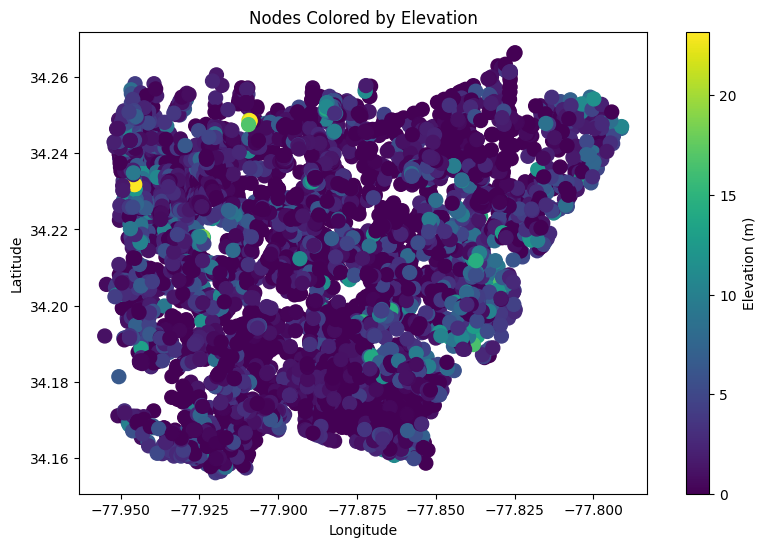

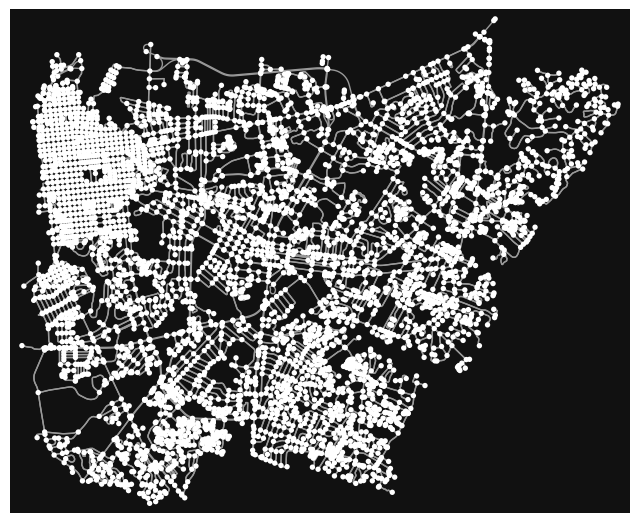

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [13]:
# Create a GeoDataFrame
df = pd.DataFrame(Wilmington_drive_node)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']))

# Plotting the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='elevation', ax=ax, legend=True, cmap='viridis', markersize=100, legend_kwds={'label': "Elevation (m)"})

# Customize plot appearance
plt.title('Nodes Colored by Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
ox.plot_graph(G)

In [57]:
# Ensure the DataFrame index is reset
Wilmington_drive_node = Wilmington_drive_node.reset_index()

# Print column names to identify the elevation column
print(Wilmington_drive_node.columns)

# Assuming 'elevation' is the name of the column with elevation data
highest_elevation = Wilmington_drive_node['elevation'].max()

print(f"The highest elevation in the DataFrame is: {highest_elevation}")


Index(['index', 'osmid', 'y', 'x', 'street_count', 'elevation', 'highway',
       'geometry'],
      dtype='object')
The highest elevation in the DataFrame is: 23.196311950683594


In [20]:
print(Wilmington_drive_edge.columns)


Index(['u', 'v', 'key', 'osmid', 'name', 'highway', 'oneway', 'reversed',
       'length', 'speed_kph', 'travel_time', 'grade', 'grade_abs', 'geometry',
       'lanes', 'ref', 'bridge', 'maxspeed', 'junction', 'access'],
      dtype='object')


In [64]:
import osmnx as ox
import pandas as pd

# Assuming Wilmington_drive is your graph object
# Get edge data as a GeoDataFrame
Wilmington_drive_edge = ox.graph_to_gdfs(Wilmington_drive, nodes=False, edges=True)

# Now you should be able to access the columns
print(Wilmington_drive_edge.columns)

Index(['osmid', 'name', 'highway', 'oneway', 'reversed', 'length', 'speed_kph',
       'travel_time', 'grade', 'grade_abs', 'geometry', 'lanes', 'ref',
       'bridge', 'maxspeed', 'junction', 'access'],
      dtype='object')


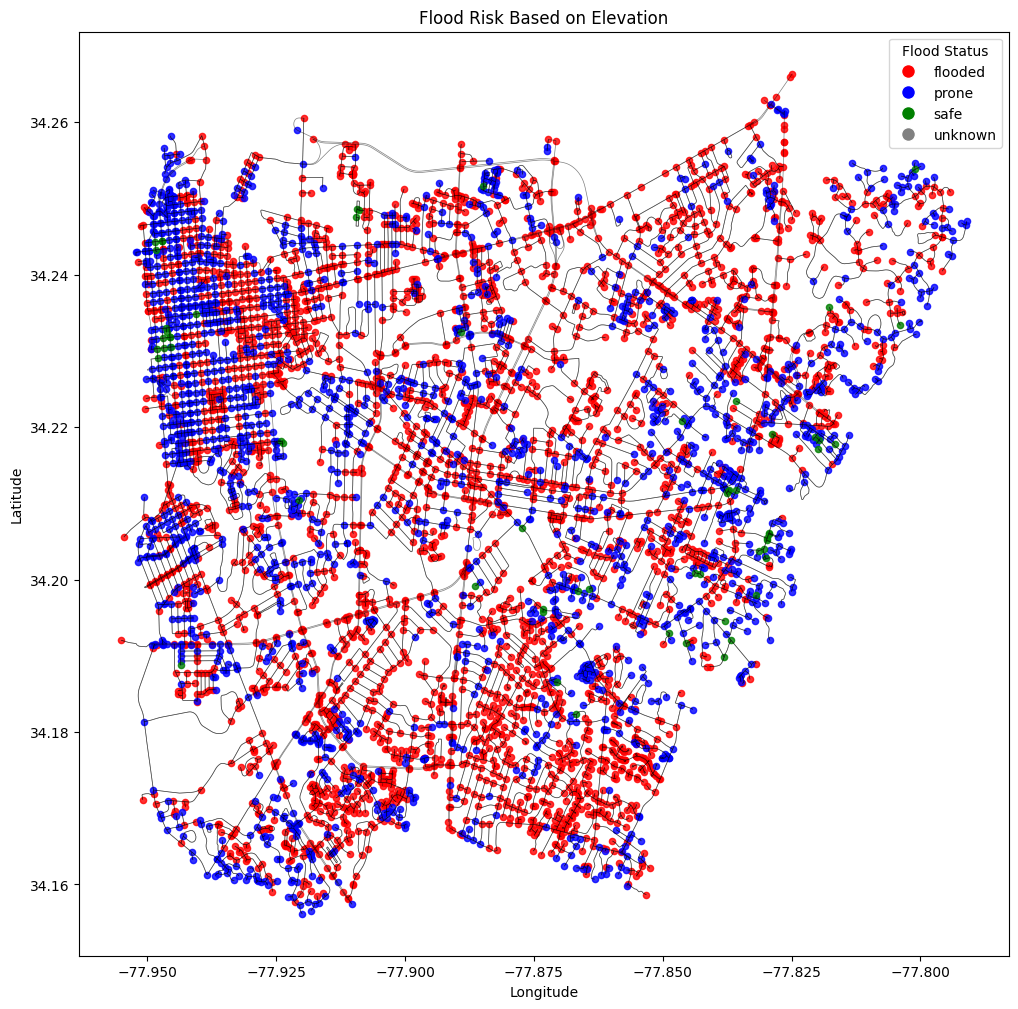

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# Define thresholds and color mapping
flooded_threshold = 2  # Elevation <= 2 meters are considered flooded

prone_threshold = 12    # Elevation between 2 and 12 meters are prone to flooding

node_color_map = {
    'flooded': 'red',
    'prone': 'blue',
    'safe': 'green',
    'unknown': 'gray'
}

# Function to classify nodes based on elevation
def classify_node_by_elevation(elevation):
    if np.isnan(elevation):
        return 'unknown'  # Handle NaN values
    elif elevation <= flooded_threshold:
        return 'flooded'
   # elif flooded_threshold < elevation <= less_flooded_threshold:
        #return 'less_flooded'  # New classification for less flooded areas
    elif flooded_threshold < elevation <= prone_threshold:
        return 'prone'
    else:
        return 'safe'

# Now you can apply this function to classify the nodes
Wilmington_drive_node['flood_status'] = Wilmington_drive_node['elevation'].apply(classify_node_by_elevation)
Wilmington_drive_node['color'] = Wilmington_drive_node['flood_status'].map(node_color_map)


# Load the CSV file into a DataFrame (assuming it contains columns for 'elevation' and 'osmid')
csv_file = 'Wilmington_drive_edge.csv'  # Replace with the actual CSV file path
#san_drive_node = pd.read_csv(csv.file)

# Apply classification
Wilmington_drive_node['flood_status'] = Wilmington_drive_node['elevation'].apply(classify_node_by_elevation)
Wilmington_drive_node['color'] = Wilmington_drive_node['flood_status'].map(node_color_map)

# Extract the flooded data
flooded_data = Wilmington_drive_node[Wilmington_drive_node['flood_status'] == 'flooded']

# Save the flooded data to a new CSV file (optional)
flooded_data.to_csv('Blue Flooded zones.csv', index=False)

# Plotting function
def plot_flooded_areas():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Plot the road network (background)
    Wilmington_drive_edge.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5, label='Road Network')

    # Plot the nodes color-coded by flood status
    for status, color in node_color_map.items():
        subset = Wilmington_drive_node[Wilmington_drive_node['flood_status'] == status]
        if not subset.empty:
            subset.plot(ax=ax, color=color, markersize=20, alpha=0.8, label=status)

    # Set aspect ratio to auto to avoid errors
    ax.set_aspect('auto')

    # Add title and labels
    plt.title("Flood Risk Based on Elevation")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Create custom legend handles
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=status)
               for status, color in node_color_map.items()]

    # Add the legend to the plot
    ax.legend(handles=handles, title="Flood Status", loc='upper right')

    # Show the plot
    plt.show()

# Call the function to plot
plot_flooded_areas()




In [101]:
def label_flood_risk(df, threshold):


    """
    Labels each edge in the dataframe based on the elevation of u and v endpoints.

    Parameters:
    df : pandas.DataFrame
        DataFrame containing 'u' and 'v' columns.
    flooded_threshold : float
        The elevation threshold below which nodes are considered flooded.

    Returns:
    pandas.DataFrame
        DataFrame with a new column 'flood_risk' indicating flood status.

    """
    def classify_edge(u, v):
        # Check if both u and v are below the  threshold
        if u < threshold and v < threshold:
            return 'flooded'
        else:
            return 'flood prone'

    df['flood_risk'] = df.apply(lambda row: classify_edge(row['u'], row['v']), axis=1)
    return df

# Example usage
Wilmington_drive_edge = label_flood_risk(Wilmington_drive_edge, threshold=5)
print(Wilmington_drive_edge[['u', 'v', 'osmid', 'flood_risk']].head())


           u          v     osmid   flood_risk
0  172430723  172430724  16680595  flood prone
1  172430724  172430723  16680595  flood prone
2  172430724  172430736  16680596  flood prone
3  172430724  172430728  16680595  flood prone
4  172430728  172430724  16680595  flood prone
